## ML: Email Marketing Campaign
## Email Marketing Campaign 
## Goal
Optimizing marketing campaigns is one of the most common data science tasks. Among the many possible marketing tools, one of the most efﬁcient is emails.

Emails are great because they are free, scalable, and can be easily personalized. Email optimization involves personalizing the text and/or the subject, who should receive it, when should be sent, etc. Machine Learning excels at this.

## Challenge Description 
The marketing team of an e-commerce site has launched an email campaign. This site has email addresses from all the users who created an account in the past. 

They have chosen a random sample of users and emailed them. The email lets the user know about a new feature implemented on the site. From the marketing team perspective, success is if the user clicks on the link inside of the email. This link takes the user to the company site. 

You are in charge of ﬁguring out how the email campaign performed and were asked the following questions:
+ What __percentage__ of users opened the email and what percentage clicked on the link within the email? 
+ The VP of marketing thinks that it is stupid to send emails in a random way. Based on all the information you have about the emails that were sent, can you __build a model to optimize__ in future how to send emails to maximize the probability of users clicking on the link inside the email? 
+ By how much do you think your model would __improve click through rate__ (deﬁned as # of users who click on the link/total users who receive the email). How would you test that? 
+ Did you ﬁnd any interesting pattern on how the email campaign performed for __different segments__ of users? Explain.


In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline

import os

cwd = os.getcwd()
# os.listdir(cwd + '\\')
# os.listdir('.')

In [2]:
os.listdir('.\\Data\\email')

['email_opened_table.csv', 'email_table.csv', 'link_clicked_table.csv']

# Import data

In [3]:
file_dir = '.\\Data\\email'

email = pd.read_csv(file_dir + '\\email_table.csv')
opened = pd.read_csv(file_dir + '\\email_opened_table.csv')
clicked = pd.read_csv(file_dir + '\\link_clicked_table.csv')

### check 'email' dataset

In [4]:
email.head()

,email_id,email_text,email_version,hour,weekday,user_country,user_past_purchases
0,85120,short_email,personalized,2,Sunday,US,5
1,966622,long_email,personalized,12,Sunday,UK,2
2,777221,long_email,personalized,11,Wednesday,US,2
3,493711,short_email,generic,6,Monday,UK,1
4,106887,long_email,generic,14,Monday,US,6


In the email dataset, there are information related to emails, such as 'email_id', 'email_text', 'email_version', 'hour', 'weekday', and users, such as 'user_country', 'user_past_purchases'. Besides 'email_id', other columns are categorical. I will exam all these columns soon. Here getting an overall picture of the data set is enough.

In [5]:
email.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 7 columns):
email_id               100000 non-null int64
email_text             100000 non-null object
email_version          100000 non-null object
hour                   100000 non-null int64
weekday                100000 non-null object
user_country           100000 non-null object
user_past_purchases    100000 non-null int64
dtypes: int64(3), object(4)
memory usage: 5.3+ MB


In [6]:
email.isnull().sum()

email_id               0
email_text             0
email_version          0
hour                   0
weekday                0
user_country           0
user_past_purchases    0
dtype: int64

there is no missing value in the data.

In [7]:
set_email = set(email['email_id'].values)

In [8]:
email['email_id'].size == len(set_email)

True

In [9]:
email.describe(include='all')

,email_id,email_text,email_version,hour,weekday,user_country,user_past_purchases
count,100000.000000,100000,100000,100000.000000,100000,100000,100000.00000
unique,NaN,2,2,NaN,7,4,NaN
top,NaN,long_email,generic,NaN,Saturday,US,NaN
freq,NaN,50276,50209,NaN,14569,60099,NaN
mean,498690.196160,NaN,NaN,9.059300,NaN,NaN,3.87845
std,289230.727534,NaN,NaN,4.439637,NaN,NaN,3.19611
min,8.000000,NaN,NaN,1.000000,NaN,NaN,0.00000
25%,246708.250000,NaN,NaN,6.000000,NaN,NaN,1.00000
50%,498447.000000,NaN,NaN,9.000000,NaN,NaN,3.00000
75%,749942.750000,NaN,NaN,12.000000,NaN,NaN,6.00000


### check 'opened' dataset

In [10]:
opened.head()

,email_id
0,284534
1,609056
2,220820
3,905936
4,164034


In [11]:
opened.isnull().sum()

email_id    0
dtype: int64

In [12]:
set_opened = set(opened['email_id'].values)

In [13]:
opened.size == len(set_opened)

True

In [14]:
opened.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10345 entries, 0 to 10344
Data columns (total 1 columns):
email_id    10345 non-null int64
dtypes: int64(1)
memory usage: 80.9 KB


### check 'clicked' dataset

In [15]:
clicked.head()

,email_id
0,609056
1,870980
2,935124
3,158501
4,177561


In [16]:
clicked.isnull().sum()

email_id    0
dtype: int64

In [17]:
set_clicked = set(clicked['email_id'].values)

In [18]:
clicked.size == len(set_clicked)

True

In [19]:
clicked.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2119 entries, 0 to 2118
Data columns (total 1 columns):
email_id    2119 non-null int64
dtypes: int64(1)
memory usage: 16.6 KB


## check whether the users in the next step are contained in the previous step.

In [20]:
print(len(set_opened) == len(set_email.intersection(set_opened)))
print(len(set_clicked) == len(set_opened.intersection(set_clicked)))
print(len(set_clicked) == len(set_email.intersection(set_clicked)))

True
False
True


Ooops, it seems the users who clicked the link is not a subset of the users who opened the email.

In [21]:
opened['open'] = 1
clicked['click'] = 1
print(opened.head())
print(clicked.head())

   email_id  open
0    284534     1
1    609056     1
2    220820     1
3    905936     1
4    164034     1
   email_id  click
0    609056      1
1    870980      1
2    935124      1
3    158501      1
4    177561      1


In [22]:
# for data in [email, opened, clicked]:
#     print(data.size, data.count(), data.nunique())

## Merge three datasets

In [23]:
email_join = email.merge(opened, how='left', on='email_id')
email_join = email_join.merge(clicked, how='left', on='email_id')

In [24]:
email_join.head()

,email_id,email_text,email_version,hour,weekday,user_country,user_past_purchases,open,click
0,85120,short_email,personalized,2,Sunday,US,5,NaN,NaN
1,966622,long_email,personalized,12,Sunday,UK,2,1.0,1.0
2,777221,long_email,personalized,11,Wednesday,US,2,NaN,NaN
3,493711,short_email,generic,6,Monday,UK,1,NaN,NaN
4,106887,long_email,generic,14,Monday,US,6,NaN,NaN


Combine email_table, email_opened_table, link_clicked_table.

In [25]:
email_join = email_join.fillna(0)

In [26]:
email_join.head()

,email_id,email_text,email_version,hour,weekday,user_country,user_past_purchases,open,click
0,85120,short_email,personalized,2,Sunday,US,5,0.0,0.0
1,966622,long_email,personalized,12,Sunday,UK,2,1.0,1.0
2,777221,long_email,personalized,11,Wednesday,US,2,0.0,0.0
3,493711,short_email,generic,6,Monday,UK,1,0.0,0.0
4,106887,long_email,generic,14,Monday,US,6,0.0,0.0


In [27]:
email_join[['open', 'click']] = email_join[['open', 'click']].astype(int)
email_join.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 100000 entries, 0 to 99999
Data columns (total 9 columns):
email_id               100000 non-null int64
email_text             100000 non-null object
email_version          100000 non-null object
hour                   100000 non-null int64
weekday                100000 non-null object
user_country           100000 non-null object
user_past_purchases    100000 non-null int64
open                   100000 non-null int32
click                  100000 non-null int32
dtypes: int32(2), int64(3), object(4)
memory usage: 6.9+ MB


In [28]:
email_join.head()

,email_id,email_text,email_version,hour,weekday,user_country,user_past_purchases,open,click
0,85120,short_email,personalized,2,Sunday,US,5,0,0
1,966622,long_email,personalized,12,Sunday,UK,2,1,1
2,777221,long_email,personalized,11,Wednesday,US,2,0,0
3,493711,short_email,generic,6,Monday,UK,1,0,0
4,106887,long_email,generic,14,Monday,US,6,0,0


In [29]:
email_join.describe(include='all')

,email_id,email_text,email_version,hour,weekday,user_country,user_past_purchases,open,click
count,100000.000000,100000,100000,100000.000000,100000,100000,100000.00000,100000.000000,100000.000000
unique,NaN,2,2,NaN,7,4,NaN,NaN,NaN
top,NaN,long_email,generic,NaN,Saturday,US,NaN,NaN,NaN
freq,NaN,50276,50209,NaN,14569,60099,NaN,NaN,NaN
mean,498690.196160,NaN,NaN,9.059300,NaN,NaN,3.87845,0.103450,0.021190
std,289230.727534,NaN,NaN,4.439637,NaN,NaN,3.19611,0.304547,0.144018
min,8.000000,NaN,NaN,1.000000,NaN,NaN,0.00000,0.000000,0.000000
25%,246708.250000,NaN,NaN,6.000000,NaN,NaN,1.00000,0.000000,0.000000
50%,498447.000000,NaN,NaN,9.000000,NaN,NaN,3.00000,0.000000,0.000000
75%,749942.750000,NaN,NaN,12.000000,NaN,NaN,6.00000,0.000000,0.000000


In [30]:
email_join.groupby(['open', 'click']).size()

open  click
0     0        89605
      1           50
1     0         8276
      1         2069
dtype: int64

one __weird__ thing here is that there are users who didn't open the email but clicked the link.

There may be some software / log / record problems.

## select reasonable data

In [31]:
email_join = email_join[
    ((email_join['open']==0) & (email_join['click']==0))
    | ((email_join['open']==1) & (email_join['click']==0))
    | ((email_join['open']==1) & (email_join['click']==1))
]

In [32]:
email_join.groupby(['open', 'click']).size()

open  click
0     0        89605
1     0         8276
      1         2069
dtype: int64

## check the amount of users who receieved the emails, who opened the emails, and who clicked the link.

open     10345
click     2069
dtype: int64


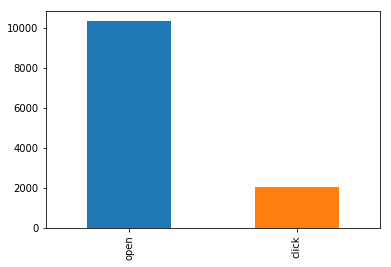

In [33]:
print(email_join[['open', 'click']].sum())
email_join[['open', 'click']].sum().plot(kind='bar')

email_id    99950
open        10345
click        2069
dtype: int64


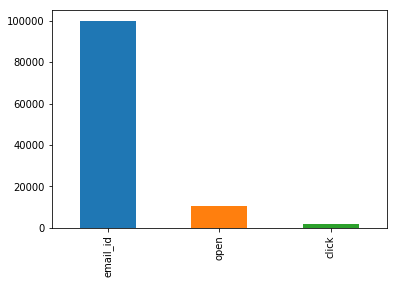

In [34]:
print(email_join[['email_id', 'open', 'click']].agg({'email_id': 'count',
                                              'open': 'sum',
                                              'click': 'sum'}))
email_join[['email_id', 'open', 'click']].agg({'email_id': 'count',
                                              'open': 'sum',
                                              'click': 'sum'}).plot(kind='bar')

## Action rate on different steps

In [35]:
email_count = email_join[['email_id', 'open', 'click']].agg({'email_id': 'count',
                                              'open': 'sum',
                                              'click': 'sum'})
email_count

email_id    99950
open        10345
click        2069
dtype: int64

In [36]:
initial = np.zeros((3,4))
initial[:,0] = email_count.values
initial[0:2, 1] = initial[1:3, 0] # 2nd
initial[:, 2] = initial[:,1] / initial[:,0] # 3rd
initial[:, 3] = 1 - initial[:, 2]
initial

array([[9.99500000e+04, 1.03450000e+04, 1.03501751e-01, 8.96498249e-01],
       [1.03450000e+04, 2.06900000e+03, 2.00000000e-01, 8.00000000e-01],
       [2.06900000e+03, 0.00000000e+00, 0.00000000e+00, 1.00000000e+00]])

In [37]:
index = ['email', 'open', 'click']
column = ['total', 'action', 'action_rate', 'drop_rate']

email_action = pd.DataFrame(initial, index=index, columns=column)
email_action['action_rate'] = email_action['action_rate'].round(3)
email_action['drop_rate'] = email_action['drop_rate'].round(3)
email_action

,total,action,action_rate,drop_rate
email,99950.0,10345.0,0.104,0.896
open,10345.0,2069.0,0.200,0.800
click,2069.0,0.0,0.000,1.000


action means the user opens an email or clicks on a link.  
the drop rate from receieving the emails to open them is ~ 90%.  
the drop rate from opening the emails to click on the links is ~ 80%.

## Exam each column

In [38]:
col_name = ['email_text', 'email_version', 'hour', 'weekday', 'user_country', 'user_past_purchases']

In [39]:
# for name in col_name:
#     print(email_join.groupby([name]).size())
#     email_join.groupby([name]).size().plot(kind='bar')
#     plt.show()
#     print('#######################')

email_text
long_email     50248
short_email    49702
dtype: int64


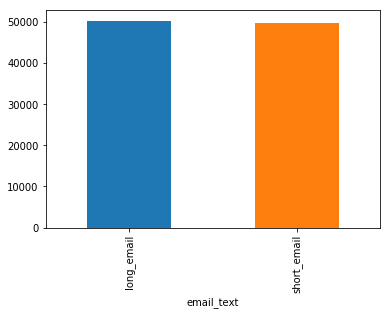

In [40]:
c_name = 'email_text'
print(email_join.groupby([c_name]).size())
email_join.groupby([c_name]).size().plot(kind='bar')

The numbers of long and short emails are close.

email_version
generic         50178
personalized    49772
dtype: int64


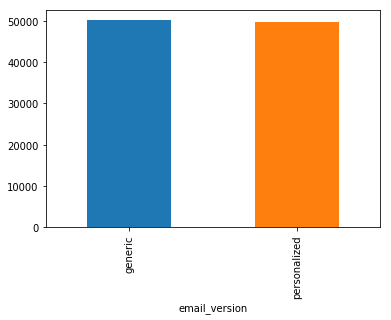

In [41]:
c_name = 'email_version'
print(email_join.groupby([c_name]).size())
email_join.groupby([c_name]).size().plot(kind='bar')

The numbers of generic and personalized emails are close.

hour
1     2701
2     3674
3     4609
4     5620
5     6548
6     7461
7     8200
8     8397
9     8524
10    8175
11    7477
12    6506
13    5579
14    4575
15    3491
16    2756
17    1893
18    1421
19     905
20     656
21     365
22     203
23     145
24      69
dtype: int64


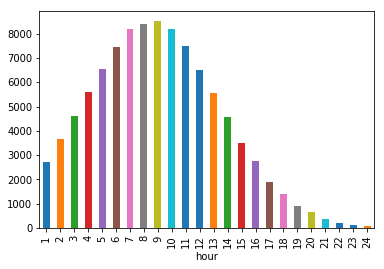

In [42]:
c_name = 'hour'
print(email_join.groupby([c_name]).size())
email_join.groupby([c_name]).size().plot(kind='bar')

More emails are sent between 6-12.

weekday
Friday       14165
Monday       14358
Saturday     14564
Sunday       14374
Thursday     14274
Tuesday      14137
Wednesday    14078
dtype: int64


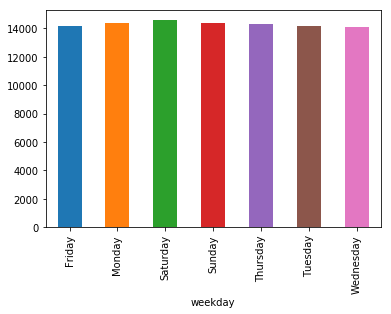

In [43]:
c_name = 'weekday'
print(email_join.groupby([c_name]).size())
email_join.groupby([c_name]).size().plot(kind='bar')

The numbers of emails sent on different weekdays are the same.

user_country
ES     9964
FR     9989
UK    19928
US    60069
dtype: int64


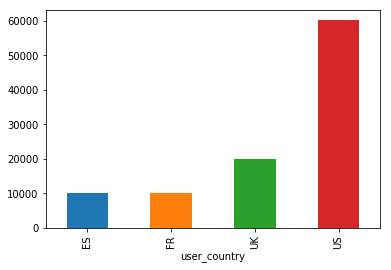

In [44]:
c_name = 'user_country'
print(email_join.groupby([c_name]).size())
email_join.groupby([c_name]).size().plot(kind='bar')

The largest user market is from US and the next is UK.


user_past_purchases
0     13872
1     13744
2     13028
3     12070
4     10736
5      9039
6      7514
7      6044
8      4393
9      3296
10     2363
11     1552
12      943
13      578
14      362
15      188
16      102
17       60
18       35
19       15
20       11
21        4
22        1
dtype: int64


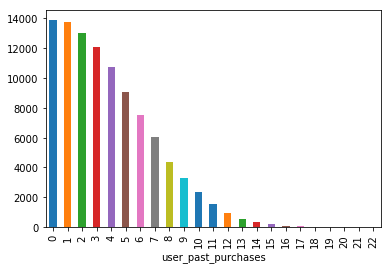

In [45]:
c_name = 'user_past_purchases'
print(email_join.groupby([c_name]).size())
email_join.groupby([c_name]).size().plot(kind='bar')

More users don't purchase any item or just purchase some items, for example, less than eight.

open
0    89605
1    10345
dtype: int64


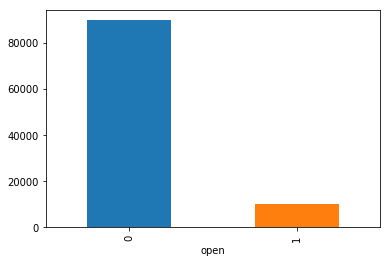

In [46]:
print(email_join.groupby(['open']).size())
email_join.groupby(['open']).size().plot(kind='bar')

click
0    97881
1     2069
dtype: int64


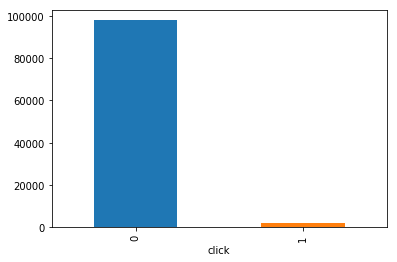

In [47]:
print(email_join.groupby(['click']).size())
email_join.groupby(['click']).size().plot(kind='bar')

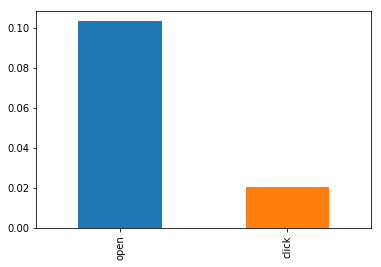

In [48]:
email_join[['open', 'click']].mean().plot(kind='bar')

# Here we start to answer question 1:
+ what percentage of users opened the email?
+ what percentage clicked on the link within the email?

In [49]:
email_join['open'].mean()

0.10350175087543773

In [50]:
email_join['click'].mean()

0.020700350175087544

+ After receiving the emails
+ 10.4% users opened the email.
+ 2.1% users clicked on the link within the email.

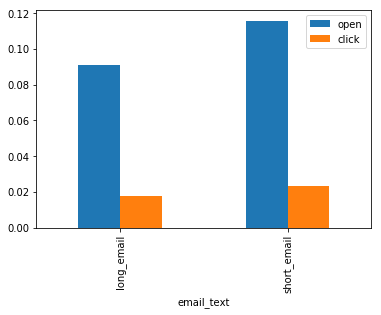

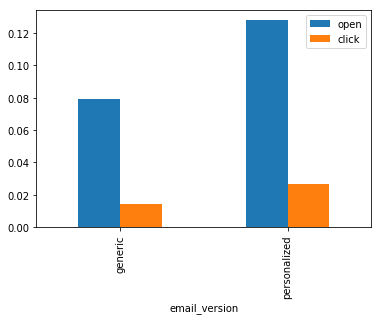

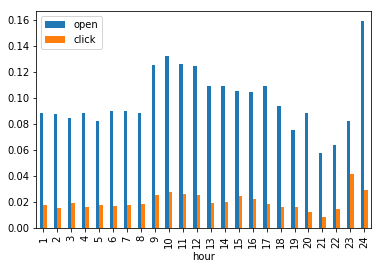

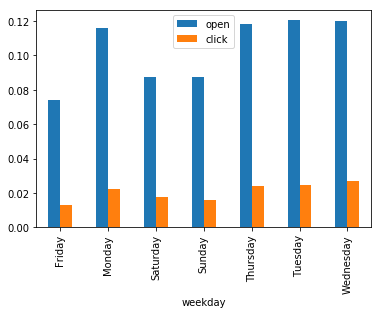

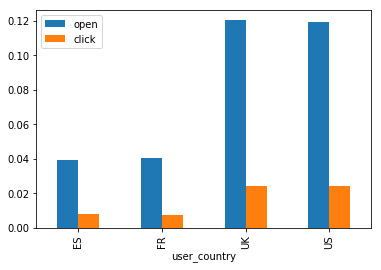

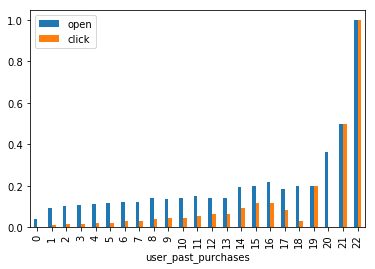

In [51]:
for name in col_name:
    email_join.groupby([name])['open', 'click'].mean().plot(kind='bar')

####  What can we learn from the above plots?
+ short email form gets higher click through rate (CTR).
+ personalized email get higher CTR.
+ prefered hours: 9-12. Though 23 and 24 gets highest CTRs, the base email number is small. A few clicks on the link will result in large CTR.
+ prefered days: M, T, W, R.
+ prefered market: US, UK.
+ CTRs are large when past purchase times are large. Pay attention to the base number here.

# Building a Model to Predict the Clicking Action

Some thoughts:  

The weekday column has seven values. If all of them become features, the feature dimension would be too large.  

We want to maximize the probability of users clicking on the link inside the email. One idea to realize this is sending personalized email to the corresponding users. So we need information about what kind of emails the company will make and what kind of users the company has. However we don't have that much user information, and the only things we have are user country and past purchases.  

Then to optimize the probability of users clicking on the link inside the email, what should we do?

We probably still can make use of the current data. The idea is like this: the decision tree / random forest model learns what kind of email and user feature combinations can optimize the clicking rate.

Then we model which emails will send to which users, and use the ML model to predict the probability of the user clicking on the link. If the probability is above some threshold, then we send email to this user. In some sense, we use the ML model filter the data first, so that a higher CTR is possible.  

In [52]:
email_join.head()

,email_id,email_text,email_version,hour,weekday,user_country,user_past_purchases,open,click
0,85120,short_email,personalized,2,Sunday,US,5,0,0
1,966622,long_email,personalized,12,Sunday,UK,2,1,1
2,777221,long_email,personalized,11,Wednesday,US,2,0,0
3,493711,short_email,generic,6,Monday,UK,1,0,0
4,106887,long_email,generic,14,Monday,US,6,0,0


In [53]:
active_day = ['Monday', 'Tuesday', 'Wednesday', 'Thursday']
active_country = ['US', 'UK']

def weekday2num(s):
    if s in active_day:
        return 1
    else:
        return 0

def country2num(s):
    if s in active_country:
        return 1
    else:
        return 0

def hour2num(x):
    if 9 <= x <= 12:
        return 1
    else:
        return 0

In [54]:
weekdayNum = email_join['weekday'].apply(weekday2num)
weekdayNum.head()

0    0
1    0
2    1
3    1
4    1
Name: weekday, dtype: int64

In [55]:
countryNum = email_join['user_country'].apply(country2num)
countryNum.head()

0    1
1    1
2    1
3    1
4    1
Name: user_country, dtype: int64

In [56]:
hourNum = email_join['hour'].apply(hour2num)
hourNum.head()

0    0
1    1
2    1
3    0
4    0
Name: hour, dtype: int64

As we learned from the plots for the clicking rates of different columns:
+ we divide the normal weekdays to non-weekend days and weekends. This is because on Fri. Sta. and Sun. the clicking rate is relatively low, which may result from that many people don't have the habit to check their emails during that time. 
+ For the countries, US and UK have close clicking rates and their values is higher than those of other two countries.
+ For the hours, we distinguish 9-12 from other hours. This is based on two facts. In this time segment, user numbers are still larger than 6000 and the clicking rate is slightly higher than those of other hours.

In [57]:
features = email_join.copy()
features.head()

,email_id,email_text,email_version,hour,weekday,user_country,user_past_purchases,open,click
0,85120,short_email,personalized,2,Sunday,US,5,0,0
1,966622,long_email,personalized,12,Sunday,UK,2,1,1
2,777221,long_email,personalized,11,Wednesday,US,2,0,0
3,493711,short_email,generic,6,Monday,UK,1,0,0
4,106887,long_email,generic,14,Monday,US,6,0,0


## feature engineering as discussed above

In [58]:
features = features.drop(columns=['email_id', 'weekday', 'user_country', 'hour'])
features['weekend'] = weekdayNum
features['USUK'] = countryNum
features['hour9_12'] = hourNum
features.head()

,email_text,email_version,user_past_purchases,open,click,weekend,USUK,hour9_12
0,short_email,personalized,5,0,0,0,1,0
1,long_email,personalized,2,1,1,0,1,1
2,long_email,personalized,2,0,0,1,1,1
3,short_email,generic,1,0,0,1,1,0
4,long_email,generic,6,0,0,1,1,0


In [59]:
features.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 99950 entries, 0 to 99999
Data columns (total 8 columns):
email_text             99950 non-null object
email_version          99950 non-null object
user_past_purchases    99950 non-null int64
open                   99950 non-null int32
click                  99950 non-null int32
weekend                99950 non-null int64
USUK                   99950 non-null int64
hour9_12               99950 non-null int64
dtypes: int32(2), int64(4), object(2)
memory usage: 6.1+ MB


In [60]:
## convert email_text, email_version to numerical values.
data_dummy= pd.get_dummies(features,drop_first=True)
data_dummy.head()

,user_past_purchases,open,click,weekend,USUK,hour9_12,email_text_short_email,email_version_personalized
0,5,0,0,0,1,0,1,1
1,2,1,1,0,1,1,0,1
2,2,0,0,1,1,1,0,1
3,1,0,0,1,1,0,1,0
4,6,0,0,1,1,0,0,0


In [61]:
data_dummy.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 99950 entries, 0 to 99999
Data columns (total 8 columns):
user_past_purchases           99950 non-null int64
open                          99950 non-null int32
click                         99950 non-null int32
weekend                       99950 non-null int64
USUK                          99950 non-null int64
hour9_12                      99950 non-null int64
email_text_short_email        99950 non-null uint8
email_version_personalized    99950 non-null uint8
dtypes: int32(2), int64(4), uint8(2)
memory usage: 4.8 MB


## Random Forest Model

In [62]:
import numpy as np

from sklearn.ensemble import RandomForestClassifier

In [63]:
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split

np.random.seed(4684)

### data preparation

In [64]:
# split into train and test to avoid overfitting
train, test = train_test_split(data_dummy, test_size = 0.34)

In [65]:
len(train), len(test)

(65967, 33983)

In [66]:
train.head()

,user_past_purchases,open,click,weekend,USUK,hour9_12,email_text_short_email,email_version_personalized
96493,5,0,0,1,1,1,1,0
94426,6,0,0,0,1,1,0,0
12469,10,1,0,1,1,1,0,0
29042,0,0,0,1,1,1,0,0
81672,9,0,0,1,1,0,1,0


In [67]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 65967 entries, 96493 to 16838
Data columns (total 8 columns):
user_past_purchases           65967 non-null int64
open                          65967 non-null int32
click                         65967 non-null int32
weekend                       65967 non-null int64
USUK                          65967 non-null int64
hour9_12                      65967 non-null int64
email_text_short_email        65967 non-null uint8
email_version_personalized    65967 non-null uint8
dtypes: int32(2), int64(4), uint8(2)
memory usage: 3.1 MB


In [68]:
test.head()

,user_past_purchases,open,click,weekend,USUK,hour9_12,email_text_short_email,email_version_personalized
15482,2,0,0,0,1,0,1,1
27454,1,0,0,1,1,1,1,1
47240,2,0,0,1,1,0,0,0
89354,2,0,0,0,0,1,0,0
69859,11,0,0,1,0,0,0,0


In [69]:
test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 33983 entries, 15482 to 57600
Data columns (total 8 columns):
user_past_purchases           33983 non-null int64
open                          33983 non-null int32
click                         33983 non-null int32
weekend                       33983 non-null int64
USUK                          33983 non-null int64
hour9_12                      33983 non-null int64
email_text_short_email        33983 non-null uint8
email_version_personalized    33983 non-null uint8
dtypes: int32(2), int64(4), uint8(2)
memory usage: 1.6 MB


## Model training

In [70]:
# build the model
rf = RandomForestClassifier(n_estimators=100, max_features=3, oob_score=True, class_weight={0:1, 1:24})
rf.fit(train.drop(['open', 'click'], axis=1), train['click'])

RandomForestClassifier(bootstrap=True, class_weight={0: 1, 1: 24},
            criterion='gini', max_depth=None, max_features=3,
            max_leaf_nodes=None, min_impurity_decrease=0.0,
            min_impurity_split=None, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=100, n_jobs=1, oob_score=True, random_state=None,
            verbose=0, warm_start=False)

## Result Analysis

In [71]:
# let's print 00B accuracy and confusion matrix

print(
    "00B accuracy is",
     rf.oob_score_,
      "\n",
      "00b Confusion Matrix",
      "\n",
      pd.DataFrame(confusion_matrix(train['click'], rf.oob_decision_function_[:,1].round(), labels=[0, 1]))
     )

00B accuracy is 0.8801825155001743 
 00b Confusion Matrix 
        0     1
0  57630  6995
1    909   433


In [72]:
# and let's print test accuracy and confusion matrix

print(
    "Test accuracy is", rf.score(test.drop(['open', 'click'], axis=1), test['click']),
    "\n",
    "Test Set Confusion Matrix",
    "\n",
    pd.DataFrame(confusion_matrix(test['click'], rf.predict(test.drop(['open', 'click'], axis=1)), labels=[0, 1]))
)

Test accuracy is 0.8760851013742165 
 Test Set Confusion Matrix 
        0     1
0  29561  3695
1    516   211


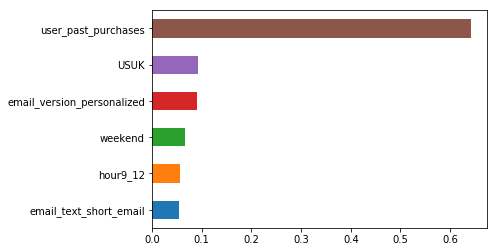

In [73]:
feat_importances = pd.Series(rf.feature_importances_, index=train.drop(['open', 'click'], axis=1).columns)
feat_importances.sort_values().plot(kind='barh')

In [74]:
train_prediction = rf.predict(train.drop(['open', 'click'], axis=1))
train_prediction

array([1, 0, 1, ..., 0, 0, 0])

In [75]:
from sklearn.metrics import classification_report, roc_curve, roc_auc_score, precision_recall_curve, precision_score

In [76]:
train_prediction = rf.predict(train.drop(['open', 'click'], axis=1))
train_prob = rf.predict_proba(train.drop(['open', 'click'], axis=1))
test_prediction = rf.predict(test.drop(['open', 'click'], axis=1))
test_prob = rf.predict_proba(test.drop(['open', 'click'], axis=1))

## Classification report

In [77]:
print(classification_report(train['click'], train_prediction, target_names=['0', '1']))

             precision    recall  f1-score   support

          0       0.99      0.89      0.94     64625
          1       0.07      0.40      0.12      1342

avg / total       0.97      0.88      0.92     65967



In [78]:
print(classification_report(test['click'], test_prediction, target_names=['0', '1']))

             precision    recall  f1-score   support

          0       0.98      0.89      0.93     33256
          1       0.05      0.29      0.09       727

avg / total       0.96      0.88      0.92     33983



The size of the testing dataset is half of that of the training dataset. However, we still achieved 5% precision which is two times of the current value from sending emails randomly, on the testing dataset.

## ROC curve

In [79]:
fpr, tpr, thresholds = roc_curve(train['click'], train_prob[:,1])
fpr_test, tpr_test, thresholds_test = roc_curve(test['click'], test_prob[:,1])

In [80]:
len(fpr), len(tpr), len(thresholds), thresholds[0]

(333, 333, 333, 1.898264498187367)

In [81]:
ROCtable = pd.DataFrame(np.array([fpr_test, tpr_test, thresholds_test]).T, columns=['fpr', 'tpr', 'thresholds'])
ROCtable.head()

,fpr,tpr,thresholds
0,0.000000,0.000000,1.898264
1,0.000030,0.000000,0.898264
2,0.000601,0.002751,0.866348
3,0.000842,0.002751,0.854854
4,0.000902,0.004127,0.844629


In [117]:
ROCtable[(0.45 <= ROCtable['tpr']) & (ROCtable['tpr'] <= 0.50)]

,fpr,tpr,thresholds
142,0.207060,0.451169,0.413462
143,0.211060,0.458047,0.410089
144,0.216232,0.467675,0.409197
145,0.217164,0.467675,0.407953
146,0.217194,0.467675,0.407827
147,0.224260,0.471802,0.406587
148,0.227327,0.474553,0.404995
149,0.227568,0.474553,0.404767
150,0.237972,0.481431,0.400471
151,0.241641,0.486933,0.397098


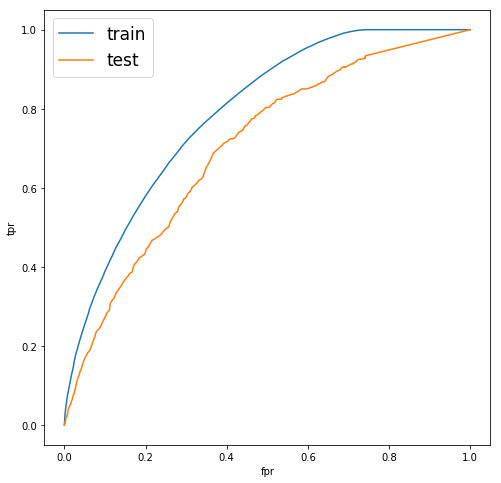

In [83]:
fig, ax = plt.subplots(figsize=(8,8))
ax.plot(fpr, tpr, label='train')
ax.plot(fpr_test, tpr_test, label='test')
ax.set_xlabel('fpr')
ax.set_ylabel('tpr')

ax.legend(loc='upper left', fontsize=17)

## ROC score

In [84]:
train_ROCscore = roc_auc_score(train['click'], train_prob[:,1])
test_ROCscore = roc_auc_score(test['click'], test_prob[:,1])
train_ROCscore, test_ROCscore

(0.790533768416319, 0.7025625724031886)

## Adjust the probability threshold

### check the number of users who will click the link.

In [111]:
for x in np.linspace(0.1,0.7,7): 
    new_test_pred = (test_prob[:,1] > x).astype(int)
    precision_s = precision_score(test['click'], new_test_pred)
    numclick = sum(new_test_pred) * precision_score(test['click'], new_test_pred)
    print(x, new_test_pred.size, sum(new_test_pred), precision_s, numclick)

0.1 33983 23805 0.02768325981936568 659.0
0.2 33983 20291 0.030456852791878174 618.0
0.3 33983 13116 0.03873132052455017 508.0
0.4 33983 8264 0.042352371732817036 350.0
0.5 33983 3906 0.0540194572452637 211.0
0.6 33983 1549 0.0697224015493867 108.00000000000001
0.7 33983 466 0.07296137339055794 34.0


In [116]:
threshold = 0.4
new_test_pred = (test_prob[:,1] > threshold).astype(int)
print('email number w/o our model:', new_test_pred.size)
print('email number w/ our model:', sum(new_test_pred))
print('percentage:', sum(new_test_pred) / new_test_pred.size)
print('reduced percentage:', 1 - sum(new_test_pred) / new_test_pred.size)
print('\n')
print('Classification Table')
print(classification_report(test['click'], new_test_pred, target_names=['0', '1']))

email number w/o our model: 33983
email number w/ our model: 8264
percentage: 0.2431804137362799
reduced percentage: 0.7568195862637201


Classification Table
             precision    recall  f1-score   support

          0       0.99      0.76      0.86     33256
          1       0.04      0.48      0.08       727

avg / total       0.97      0.76      0.84     33983



## P-R curve

In [85]:
precision, recall, thresholds = precision_recall_curve(test['click'], test_prob[:,1])

In [86]:
len(precision), len(recall), len(thresholds)

(335, 335, 334)

In [87]:
PRtable = pd.DataFrame(np.array([precision[:-1], recall[:-1], thresholds]).T, columns=['precision', 'recall', 'thresholds'])
PRtable.head()

,precision,recall,thresholds
0,0.021393,1.000000,0.000000
1,0.026783,0.933975,0.006154
2,0.026784,0.933975,0.006667
3,0.026749,0.932600,0.006857
4,0.026712,0.931224,0.008000


In [88]:
PRtable[(PRtable['thresholds'] >= 0.3714) & (PRtable['thresholds'] <= 0.4004)]

,precision,recall,thresholds
169,0.041292,0.518569,0.371491
170,0.041311,0.518569,0.371905
171,0.041342,0.518569,0.372608
172,0.041206,0.513067,0.374236
173,0.041275,0.513067,0.376938
174,0.040862,0.500688,0.377634
175,0.040908,0.500688,0.378462
176,0.041084,0.500688,0.380196
177,0.041150,0.497937,0.381068
178,0.041178,0.497937,0.381510


Text(0,0.5,'precision')

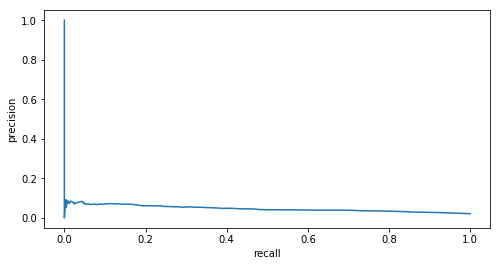

In [89]:
fig, ax = plt.subplots(figsize=(8,4))
ax.plot(recall, precision)
ax.set_xlabel('recall')
ax.set_ylabel('precision')

# Conclusion & Summary

### What __percentage__ of users opened the email and what percentage clicked on the link within the email? 

+ After receiving the emails
    + 10.4% users opened the email.
    + 2.1% users clicked on the link within the email.

### The VP of marketing thinks that it is stupid to send emails in a random way. Based on all the information you have about the emails that were sent, can you __build a model to optimize__ in future how to send emails to maximize the probability of users clicking on the link inside the email?

The idea is like this: the decision tree / random forest model learns what kind of email and user feature combinations can optimize the clicking rate. Then we model which emails will send to which users, and use the ML model to predict the probability of the user clicking on the link. If the probability is above some threshold, then we send email to this user. In some sense, we use the ML model filter the data first, so that a higher CTR is possible. 

### By how much do you think your model would __improve click through rate__ (deﬁned as # of users who click on the link/total users who receive the email). How would you test that? 

email number w/o our model: 33983  
email number w/ our model: 8264  
percentage: 0.2431804137362799  
reduced percentage: 0.7568195862637201  

According to the analysis above, the company is able to double the click through rate but only need to send one fourth of the original amount of emails.

How to test it?  
I suggest to run an A/B test:  
1. Divide the users into "control group" and "test group" following the random principle.
2. For the control group, the company sends emails to all the users as usual and randomly.
3. For the test group, the company first uses the model to predict which user will click on the link and then just send emails to them.
4. Determine each user's response to the email. Then run a T-test to check if the difference is significant or not.


### Did you ﬁnd any interesting pattern on how the email campaign performed for __different segments__ of users? Explain.

+ short email form gets higher click through rate (CTR). __(easy to read)__
+ personalized email get higher CTR. __(respect the user)__
+ prefered hours: 9-12. Though 23 and 24 gets highest CTRs, the base email number is small. A few clicks on the link will result in large CTR. __(the regular time to start work and check emails)__
+ prefered days: M, T, W, R. __(people are used to check emails on weekdays)__
+ prefered market: US, UK. __(major markets and english speaking country)__
+ CTRs are large when past purchase times are large. Pay attention to the base number here. __(the more one purchased in the past, the stronger one's intention to purchase angin and get new information about product)__

## Below is some previous analysis

In [59]:
email_join.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 99950 entries, 0 to 99999
Data columns (total 9 columns):
email_id               99950 non-null int64
email_text             99950 non-null object
email_version          99950 non-null object
hour                   99950 non-null int64
weekday                99950 non-null object
user_country           99950 non-null object
user_past_purchases    99950 non-null int64
open                   99950 non-null int32
click                  99950 non-null int32
dtypes: int32(2), int64(3), object(4)
memory usage: 6.9+ MB


In [60]:
import numpy as np

from sklearn.ensemble import RandomForestClassifier

In [61]:
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split

np.random.seed(4684)

In [62]:
data_dummy= pd.get_dummies(email_join,drop_first=True)
data_dummy.head()

,email_id,hour,user_past_purchases,open,click,email_text_short_email,email_version_personalized,weekday_Monday,weekday_Saturday,weekday_Sunday,weekday_Thursday,weekday_Tuesday,weekday_Wednesday,user_country_FR,user_country_UK,user_country_US
0,85120,2,5,0,0,1,1,0,0,1,0,0,0,0,0,1
1,966622,12,2,1,1,0,1,0,0,1,0,0,0,0,1,0
2,777221,11,2,0,0,0,1,0,0,0,0,0,1,0,0,1
3,493711,6,1,0,0,1,0,1,0,0,0,0,0,0,1,0
4,106887,14,6,0,0,0,0,1,0,0,0,0,0,0,0,1


In [63]:
data_dummy.head()

,email_id,hour,user_past_purchases,open,click,email_text_short_email,email_version_personalized,weekday_Monday,weekday_Saturday,weekday_Sunday,weekday_Thursday,weekday_Tuesday,weekday_Wednesday,user_country_FR,user_country_UK,user_country_US
0,85120,2,5,0,0,1,1,0,0,1,0,0,0,0,0,1
1,966622,12,2,1,1,0,1,0,0,1,0,0,0,0,1,0
2,777221,11,2,0,0,0,1,0,0,0,0,0,1,0,0,1
3,493711,6,1,0,0,1,0,1,0,0,0,0,0,0,1,0
4,106887,14,6,0,0,0,0,1,0,0,0,0,0,0,0,1


In [64]:
data_dummy[['open','click']] = data_dummy[['open', 'click']].astype(int)
data_dummy.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 99950 entries, 0 to 99999
Data columns (total 16 columns):
email_id                      99950 non-null int64
hour                          99950 non-null int64
user_past_purchases           99950 non-null int64
open                          99950 non-null int32
click                         99950 non-null int32
email_text_short_email        99950 non-null uint8
email_version_personalized    99950 non-null uint8
weekday_Monday                99950 non-null uint8
weekday_Saturday              99950 non-null uint8
weekday_Sunday                99950 non-null uint8
weekday_Thursday              99950 non-null uint8
weekday_Tuesday               99950 non-null uint8
weekday_Wednesday             99950 non-null uint8
user_country_FR               99950 non-null uint8
user_country_UK               99950 non-null uint8
user_country_US               99950 non-null uint8
dtypes: int32(2), int64(3), uint8(11)
memory usage: 4.9 MB


In [65]:
# split into train and test to avoid overfitting
train, test = train_test_split(data_dummy, test_size = 0.34)

In [66]:
train.shape, test.shape

((65967, 16), (33983, 16))

In [67]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 65967 entries, 96493 to 16838
Data columns (total 16 columns):
email_id                      65967 non-null int64
hour                          65967 non-null int64
user_past_purchases           65967 non-null int64
open                          65967 non-null int32
click                         65967 non-null int32
email_text_short_email        65967 non-null uint8
email_version_personalized    65967 non-null uint8
weekday_Monday                65967 non-null uint8
weekday_Saturday              65967 non-null uint8
weekday_Sunday                65967 non-null uint8
weekday_Thursday              65967 non-null uint8
weekday_Tuesday               65967 non-null uint8
weekday_Wednesday             65967 non-null uint8
user_country_FR               65967 non-null uint8
user_country_UK               65967 non-null uint8
user_country_US               65967 non-null uint8
dtypes: int32(2), int64(3), uint8(11)
memory usage: 3.2 MB


In [69]:
# build the model
rf = RandomForestClassifier(n_estimators=100, max_features=3, oob_score=True)
rf.fit(train.drop(['email_id', 'open', 'click'], axis=1), train['click'])

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features=3, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=1,
            oob_score=True, random_state=None, verbose=0, warm_start=False)

In [70]:
# let's print 00B accuracy and confusion matrix

print(
    "00B accuracy is",
     rf.oob_score_,
      "\n",
      "00b Confusion Matrix",
      "\n",
      pd.DataFrame(confusion_matrix(train['click'], rf.oob_decision_function_[:,1].round(), labels=[0, 1]))
     )

00B accuracy is 0.9757606075765155 
 00b Confusion Matrix 
        0    1
0  64354  271
1   1328   14


In [71]:
# and let's print test accuracy and confusion matrix

print(
    "Test accuracy is", rf.score(test.drop(['email_id', 'open', 'click'], axis=1), test['click']),
    "\n",
    "Test Set Confusion Matrix",
    "\n",
    pd.DataFrame(confusion_matrix(test['click'], rf.predict(test.drop(['email_id', 'open', 'click'], axis=1)), labels=[0, 1]))
)

Test accuracy is 0.9759879939969985 
 Test Set Confusion Matrix 
        0   1
0  33162  94
1    722   5


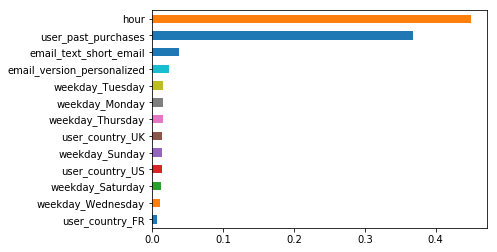

In [72]:
feat_importances = pd.Series(rf.feature_importances_, index=train.drop(['email_id', 'open', 'click'], axis=1).columns)
feat_importances.sort_values().plot(kind='barh')

In [78]:
# build the model
rf = RandomForestClassifier(n_estimators=100, max_features=3, oob_score=True, class_weight={0:1, 1:100})
rf.fit(train.drop(['email_id', 'open', 'click'], axis=1), train['click'])

RandomForestClassifier(bootstrap=True, class_weight={0: 1, 1: 100},
            criterion='gini', max_depth=None, max_features=3,
            max_leaf_nodes=None, min_impurity_decrease=0.0,
            min_impurity_split=None, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=100, n_jobs=1, oob_score=True, random_state=None,
            verbose=0, warm_start=False)

In [79]:
# let's print 00B accuracy and confusion matrix

print(
    "00B accuracy is",
     rf.oob_score_,
      "\n",
      "00b Confusion Matrix",
      "\n",
      pd.DataFrame(confusion_matrix(train['click'], rf.oob_decision_function_[:,1].round(), labels=[0, 1]))
     )

00B accuracy is 0.8975396789303742 
 00b Confusion Matrix 
        0     1
0  59034  5591
1   1168   174


In [80]:
# and let's print test accuracy and confusion matrix

print(
    "Test accuracy is", rf.score(test.drop(['email_id', 'open', 'click'], axis=1), test['click']),
    "\n",
    "Test Set Confusion Matrix",
    "\n",
    pd.DataFrame(confusion_matrix(test['click'], rf.predict(test.drop(['email_id', 'open', 'click'], axis=1)), labels=[0, 1]))
)

Test accuracy is 0.8922696642438867 
 Test Set Confusion Matrix 
        0     1
0  30210  3046
1    615   112


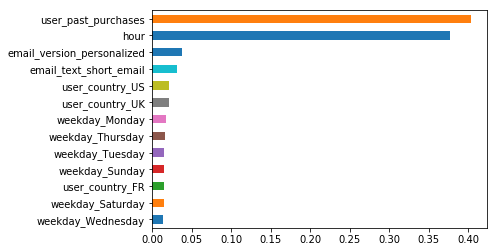

In [81]:
feat_importances = pd.Series(rf.feature_importances_, index=train.drop(['email_id', 'open', 'click'], axis=1).columns)
feat_importances.sort_values().plot(kind='barh')

In [82]:
import graphviz
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import export_graphviz
from graphviz import Source

In [83]:
tree = DecisionTreeClassifier(max_depth=2, class_weight={0:1, 1:10}, min_impurity_decrease = 0.001)
tree.fit(train.drop(['email_id', 'open', 'click'], axis=1), train['click'])

DecisionTreeClassifier(class_weight={0: 1, 1: 10}, criterion='gini',
            max_depth=2, max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.001, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [84]:
# visualize it
export_graphviz(tree, out_file="tree_conversion.dot", 
                feature_names=train.drop(['email_id', 'open', 'click'], axis=1).columns,
               proportion=True, rotate=True)
with open("tree_conversion.dot") as f:
    dot_graph = f.read()
    
s = Source.from_file("tree_conversion.dot")
s.view()

'tree_conversion.dot.pdf'